In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

In [3]:
len(tf.config.experimental.list_physical_devices('GPU'))

0

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [6]:
data=np.load('fashion_mnist_dataset_train.npy',allow_pickle=True)
data_as_list=data.tolist()
data_features=data_as_list['features']
data_target=data_as_list['target']

print(data_features.shape)
print(data_target.shape)

(60000, 28, 28)
(60000,)


In [7]:
data_target=data_target.astype(int)
np.unique(data_target)

array([1, 2, 3, 4, 5])

In [8]:
data_features = data_features.reshape((60000, 28, 28, 1))

In [9]:
data_target_new=data_target-1

In [10]:
train_valid_x, test_x, train_valid_y, test_y = train_test_split(data_features, data_target_new, test_size=0.1, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.1111, random_state=275)

In [11]:
valid_x.shape,train_x.shape,test_x.shape

((6000, 28, 28, 1), (48000, 28, 28, 1), (6000, 28, 28, 1))

In [12]:
#Creating convolutional layers
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )
conv2 = layers.Conv2D(64, (3,3), activation='relu')
conv3 = layers.Conv2D(128, (3,3), activation='relu')

#Creating Max Pooling Layers
max_pool_1 = layers.MaxPooling2D((2,2))
max_pool_2 = layers.MaxPooling2D((2,2))
max_pool_3 = layers.MaxPooling2D((2,2))

flat_layer = layers.Flatten()

#Creating dense layers
fc = layers.Dense(128, activation='relu')
output = layers.Dense(5, 'softmax')
drop_1 = layers.Dropout(0.5)
drop_2 = layers.Dropout(0.5)
drop_3 = layers.Dropout(0.5)

In [13]:
new_model_3 = models.Sequential()

new_conv1 = layers.Conv2D(32, (3,3),padding='same', activation='relu', input_shape=(28,28,1) )
new_conv2 = layers.Conv2D(64, (3,3),padding='same', activation='relu')
new_conv3 = layers.Conv2D(128, (3,3),padding='same', activation='relu')

new_model_3.add(new_conv1)
new_model_3.add(max_pool_1)
new_model_3.add(new_conv2)
new_model_3.add(max_pool_2)
#new_model.add(drop_2)
new_model_3.add(new_conv3)
new_model_3.add(max_pool_3)
new_model_3.add(drop_3)
new_model_3.add(flat_layer)
new_model_3.add(layers.Dense(128, activation='relu'))
new_model_3.add(layers.Dense(5, 'softmax'))

In [14]:
new_model_3.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
new_model_3_obj=new_model_3.fit(train_valid_x, train_valid_y, epochs=30, shuffle=True, validation_split=0.1111)

Epoch 1/30
1500/1500 [==============================] - 27s 18ms/step - loss: 1.1713 - accuracy: 0.5097 - val_loss: 0.6676 - val_accuracy: 0.7233
Epoch 2/30
1500/1500 [==============================] - 26s 17ms/step - loss: 0.7283 - accuracy: 0.6982 - val_loss: 0.5684 - val_accuracy: 0.7753
Epoch 3/30
1500/1500 [==============================] - 28s 19ms/step - loss: 0.6325 - accuracy: 0.7442 - val_loss: 0.5058 - val_accuracy: 0.7918
Epoch 4/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5582 - accuracy: 0.7736 - val_loss: 0.4365 - val_accuracy: 0.8353
Epoch 5/30
1500/1500 [==============================] - 26s 17ms/step - loss: 0.5035 - accuracy: 0.7953 - val_loss: 0.4127 - val_accuracy: 0.8330
Epoch 6/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.4666 - accuracy: 0.8146 - val_loss: 0.3704 - val_accuracy: 0.8602
Epoch 7/30
1500/1500 [==============================] - 26s 17ms/step - loss: 0.4253 - accuracy: 0.8275 - val_loss: 0.3590 -

In [16]:
test_loss, test_accuracy = new_model_3.evaluate(test_x, test_y)

188/188 [==============================] - 1s 5ms/step - loss: 0.2390 - accuracy: 0.9077


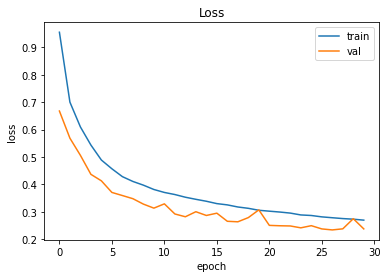

In [17]:
pyplot.plot(new_model_3_obj.history['loss'])
pyplot.plot(new_model_3_obj.history['val_loss'])
pyplot.title("Loss")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='upper right')
pyplot.show()

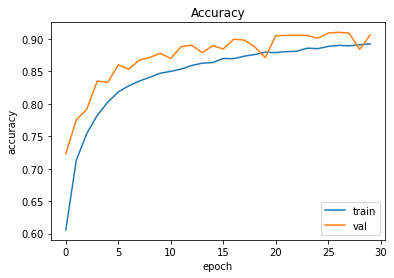

In [18]:
pyplot.plot(new_model_3_obj.history['accuracy'])
pyplot.plot(new_model_3_obj.history['val_accuracy'])
pyplot.title("Accuracy")
pyplot.ylabel("accuracy")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='lower right')
pyplot.show()

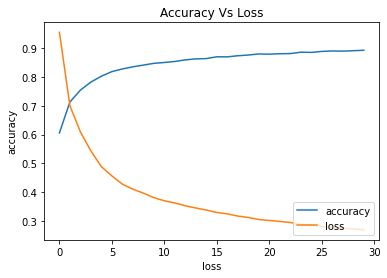

In [19]:
pyplot.plot(new_model_3_obj.history['accuracy'])
pyplot.plot(new_model_3_obj.history['loss'])
pyplot.title("Accuracy Vs Loss")
pyplot.ylabel("accuracy")
pyplot.xlabel("loss")
pyplot.legend(['accuracy', 'loss'], loc='lower right')
pyplot.show()

In [20]:
data=np.load('fashion_mnist_test.npy',allow_pickle=True)
data_as_list=data.tolist()
data_features_test=data_as_list['features']
data_id_test=data_as_list['id']
print(data_features_test.shape)
print(data_id_test.shape)

(10000, 28, 28)
(10000,)


In [21]:
data_features_test = data_features_test.reshape((10000, 28, 28, 1))

In [22]:
test_lables_y = new_model_3.predict_classes(data_features_test)

C:\Users\uttej\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
test_lables_y=test_lables_y+1
test_lables_y

array([4, 3, 2, ..., 4, 1, 4], dtype=int64)

In [24]:
np.unique(test_lables_y)

array([1, 2, 3, 4, 5], dtype=int64)

In [25]:
id_test =pd.DataFrame(data_id_test,columns=['id'])
target =pd.DataFrame(test_lables_y,columns=['target'])
y_final = pd.concat([id_test, target], axis=1)
y_final

,id,target
0,0,4
1,1,3
2,2,2
3,3,1
4,4,1
...,...,...
9995,9995,4
9996,9996,1
9997,9997,4
9998,9998,1


In [26]:
pwd

'C:\\Users\\uttej\\OneDrive - University of Waterloo\\Documents\\657A\\A4\\Fashion\\Final'

In [27]:
y_final.to_csv(r'C:\\Users\\uttej\\OneDrive - University of Waterloo\\Documents\\657A\\A4\\Fashion\\4.12\\fashion_4_12.csv',index=False)